In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # importing neccesary ,libraries

In [2]:
Data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv") #loading the dataset

In [3]:
Data.head() #checking the loaded data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
Data.shape #checking the rows and columns

(30, 17)

In [5]:
Data.info() #checking the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
# From the above data it can be concluded that there is no object data type. 

In [7]:
Data.isnull().sum() #Checking if there is no null values

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [8]:
#There is no null values in the above dataset

In [9]:
Data.count()

W      30
R      30
AB     30
H      30
2B     30
3B     30
HR     30
BB     30
SO     30
SB     30
RA     30
ER     30
ERA    30
CG     30
SHO    30
SV     30
E      30
dtype: int64

In [10]:
#There are any non empty values

In [11]:
Data.describe() #Checking the statistics

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [12]:
#There is a huge difference between mean and standard deviation figures, thereby implying skewness
#There is also a huge difference between minimum and maximum figures.
#Data also shows the possibility of Outliers

In [13]:
X=Data.drop('W',axis=1)
Y=Data['W'] #Seperating the target and classes

In [14]:
##Observing the Target Variable

<AxesSubplot:>

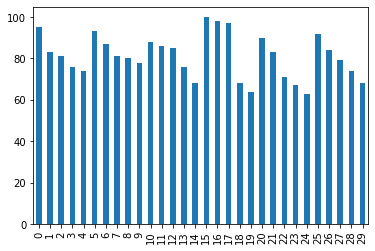

In [15]:
Y.plot(kind='bar') #Checking the target variable

In [16]:
Y.value_counts()

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64

In [17]:
#Looking at the data, following things can be concluded:
# 1. Majority of the prediction has been made to 68%,81%,76%,74% and 83%
# 2. There might be a possibility that the model can get biased towards these outcomes


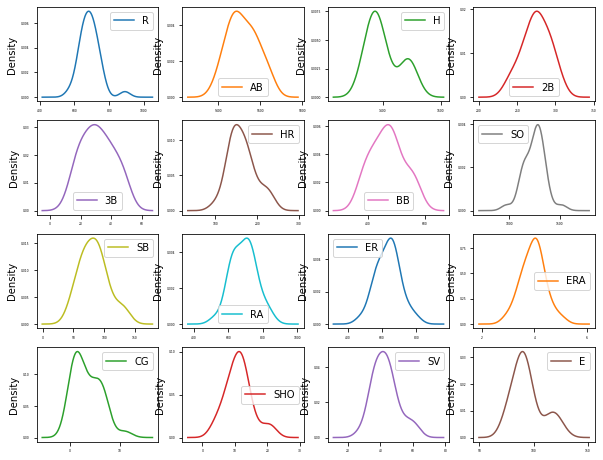

In [18]:
X.plot(kind='kde',subplots=True,layout=(4,4),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show() #Visualizing the feature

In [19]:
#Data is highly skewed: Specially 'R','SO','CG','SV','SHO' and 'E'

In [20]:
X.skew().sort_values(ascending=False)

R      1.200786
E      0.890132
CG     0.736845
H      0.670254
SV     0.657524
SHO    0.565790
HR     0.516441
SB     0.479893
AB     0.183437
BB     0.158498
3B     0.129502
ER     0.058710
ERA    0.053331
RA     0.045734
SO    -0.156065
2B    -0.230650
dtype: float64

In [21]:
from sklearn.preprocessing import power_transform

In [22]:
New_X=np.sqrt(X)

In [23]:
pd.DataFrame(New_X,columns=X.columns).skew().sort_values(ascending=False) # checking the skewness of the data after applying power transformation technique

R      0.968676
E      0.763487
H      0.649567
SV     0.410288
HR     0.264948
AB     0.172254
SB     0.158381
BB     0.053448
SHO   -0.061761
RA    -0.096160
ER    -0.109548
ERA   -0.133224
3B    -0.142922
2B    -0.302835
CG    -0.311476
SO    -0.348513
dtype: float64

In [24]:
X= pd.DataFrame(New_X, columns=X.columns) #Reassigning the columns

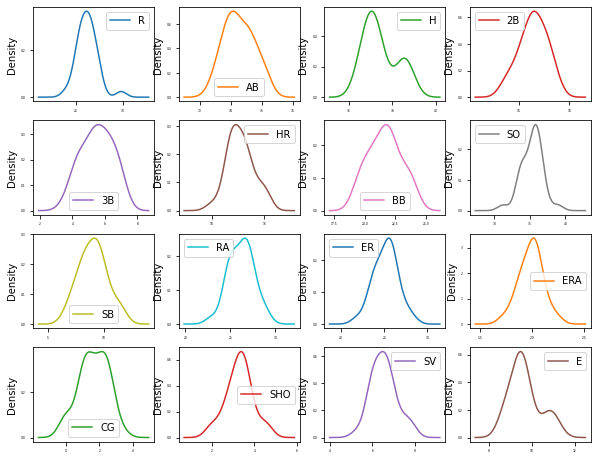

In [25]:
X.plot(kind='kde',subplots=True,layout=(4,4),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show() #Visualizing the feature

In [26]:
#Data is still skewed, hence data needs to be further transformed

In [27]:
Skewed_value=power_transform(X[['R','E','SO','CG']])

In [28]:
pd.DataFrame(Skewed_value).skew()

0   -0.055379
1    0.065358
2    0.040843
3   -0.133250
dtype: float64

In [29]:
X[['R','E','SO','CG']]=pd.DataFrame(Skewed_value) #Assigning back the values

In [30]:
X.skew().sort_values(ascending=False)

H      0.649567
SV     0.410288
HR     0.264948
AB     0.172254
SB     0.158381
E      0.065358
BB     0.053448
SO     0.040843
R     -0.055379
SHO   -0.061761
RA    -0.096160
ER    -0.109548
ERA   -0.133224
CG    -0.133250
3B    -0.142922
2B    -0.302835
dtype: float64

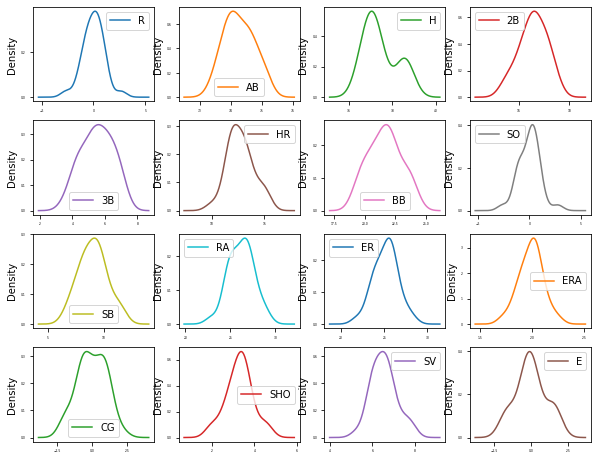

In [34]:
X.plot(kind='kde',subplots=True,layout=(4,4),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show() #Visualizing the feature after transforming the value

### Comparing the feature and target Data

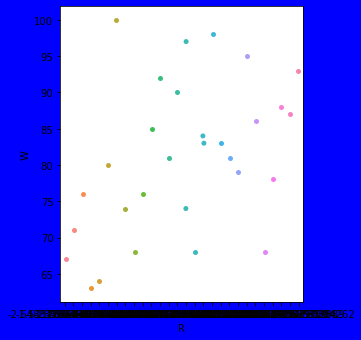

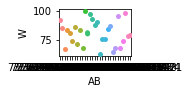

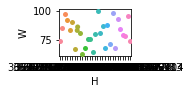

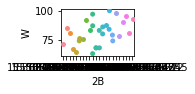

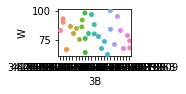

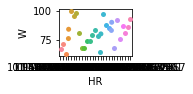

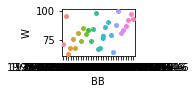

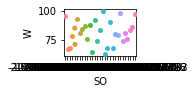

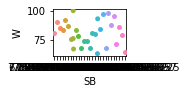

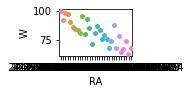

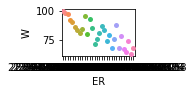

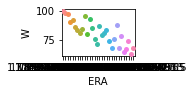

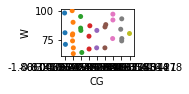

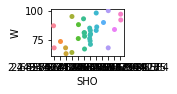

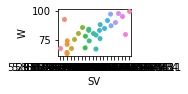

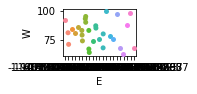

In [31]:
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber=1
for column in X.columns:
 if plotnumber<=16:
    ax=plt.subplot(4,4,plotnumber)
    sns.stripplot(X[column],Y)
    plt.xlabel(column)
    plt.ylabel('W')
 plotnumber=plotnumber+1
 plt.show()

In [32]:
#From the above observation between the features and labels- Following things can be concluded:
#1. There is a positive relation between R,SV,AB,H,BB with W
#2. There is no relationship between 2B,3B,HR,SO,SB,CG,E,SHO with W
#3. There is a negative relation between RA,ER,ERA with W
 

### Comparing the feature data with each other 

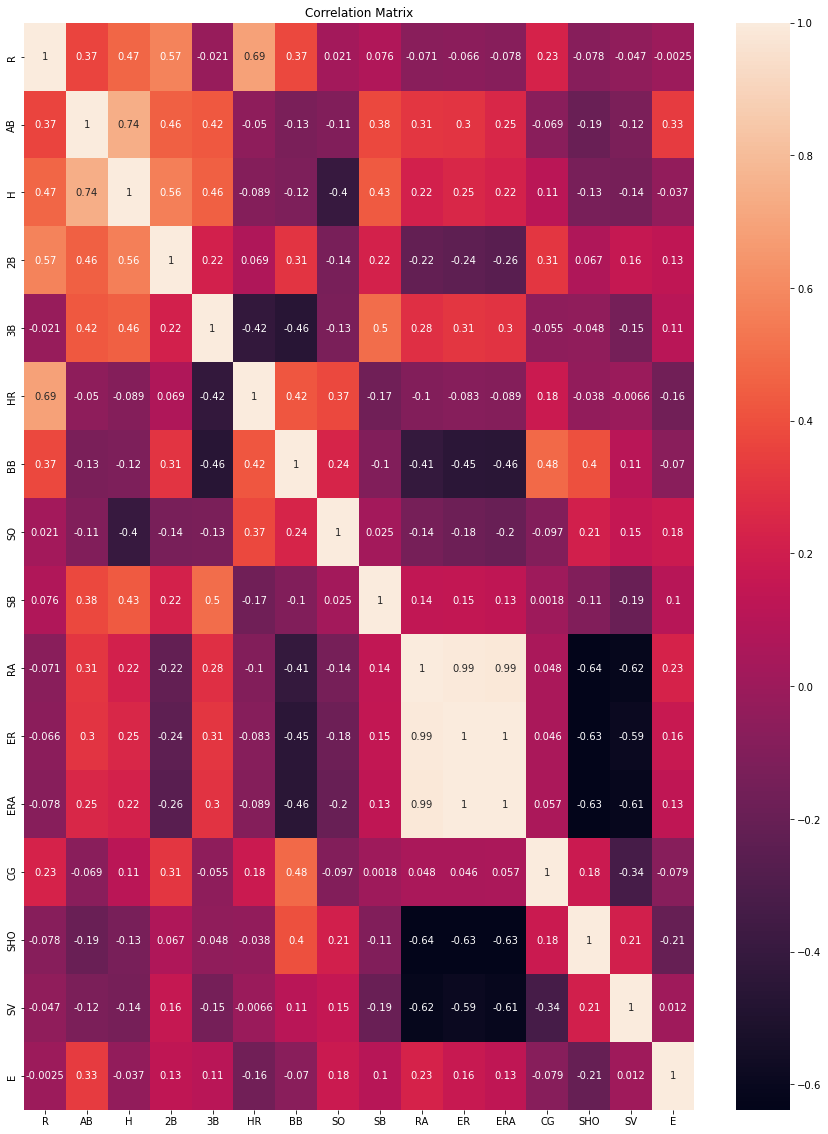

In [36]:
corr_mat=X.corr()
plt.figure(figsize=[15,20])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show() #Checking correlation

In [37]:
# By looking at the heat map it can be concluded that there is an issue of collinearity between 'RA','ER'and 'ERA'

In [38]:
#Checing the issue of multicollinearity via VIF

In [39]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,R,9.065747
1,AB,27315.355691
2,H,17253.302915
3,2B,3636.292045
4,3B,120.844729
5,HR,970.875684
6,BB,1037.380242
7,SO,2.549728
8,SB,115.717693
9,RA,65163.391254


In [40]:
#There is a high range of multicollinearity existing in the features

In [47]:
#Looking at the heatmap and VIF, 'ER'and 'ERA can be dropped as it has a high range of multicollinearity as compared as 'RA'
#There is also no relationship of ER and ERA with the target variable (W)
#Therefore ER and ERA can be dropped

In [44]:
X.drop('ER',axis=1,inplace=True) #dropping ER column

In [48]:
X.drop('ERA',axis=1,inplace=True) #dropping ERA column

In [49]:
X

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,0.728348,74.665923,38.691084,17.320508,6.480741,11.789826,19.570386,-2.570258,10.198039,25.317978,-0.335037,2.828427,7.483315,-0.335379
1,0.261277,73.939164,36.728735,16.643317,6.633250,12.489996,20.952327,0.134940,8.366600,26.457513,-0.335037,3.464102,6.708204,-0.532646
2,-0.244845,73.749576,37.349699,17.406895,5.385165,11.874342,23.086793,-0.901197,9.273618,25.298221,2.092697,3.162278,6.164414,-1.342180
3,-1.285265,74.384138,37.161808,16.124515,5.196152,11.661904,20.099751,-0.189581,8.246211,26.476405,1.199633,3.000000,6.082763,0.678684
4,0.135665,74.866548,38.923001,17.000000,7.000000,12.288206,21.330729,0.085489,9.110434,28.337255,1.199633,3.464102,5.916080,-0.532646
5,2.671271,74.222638,38.470768,17.549929,4.123106,15.231546,23.874673,-0.957905,9.380832,25.884358,1.199633,3.162278,5.830952,-0.335379
6,1.309828,74.612331,37.376463,16.492423,4.358899,14.560220,23.537205,-0.228618,7.937254,26.419690,0.046360,2.000000,6.928203,0.104285
7,0.551309,74.060786,37.013511,15.684387,4.472136,14.730920,20.445048,0.807146,6.633250,26.324893,-1.866003,3.162278,6.557439,-1.613941
8,-0.770368,74.060786,37.188708,16.673332,5.656854,12.922848,20.880613,0.594551,9.327379,25.337719,-0.814186,3.464102,7.745967,0.261351
9,1.088246,75.099933,38.665230,17.146428,5.744563,12.688578,21.863211,-0.986203,8.426150,27.440845,0.046360,3.162278,6.324555,0.408957


In [50]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,R,8.917128
1,AB,25320.495033
2,H,16034.399818
3,2B,3266.589511
4,3B,111.625384
5,HR,814.456172
6,BB,917.649056
7,SO,2.140857
8,SB,110.547799
9,RA,1882.979152


In [51]:
#Even though AB and H has a high range of multicollearity, but these two cannot be dropped as they have a positive relation with W

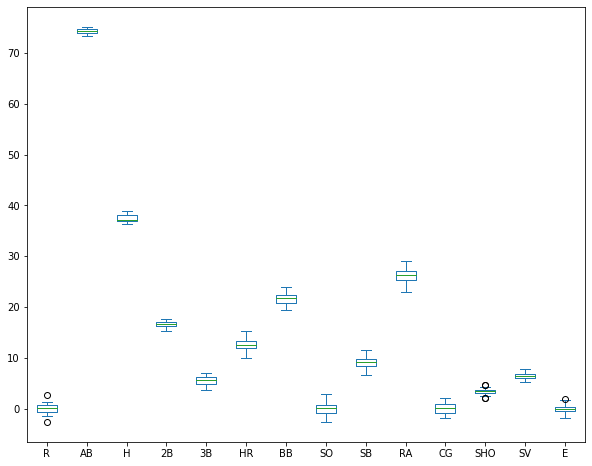

In [52]:
X.plot(kind='box',figsize=(10,8),layout=(6,6))
plt.show() #checking for oultiers

In [53]:
#In the above observation- 'R','SHO' and 'E' has outliers

In [54]:
from scipy.stats import zscore

In [59]:
(np.abs(zscore(X)>3)).all()

R      False
AB     False
H      False
2B     False
3B     False
HR     False
BB     False
SO     False
SB     False
RA     False
CG     False
SHO    False
SV     False
E      False
dtype: bool

In [58]:
index = np.where(np.abs(zscore(X))>3)
index

(array([], dtype=int64), array([], dtype=int64))

In [60]:
#As per zscore there is no value which is higher than 3, hence outliers does not need to be removed

In [61]:
Scalar=StandardScaler() #scaling the data

In [62]:
X_Scaled=Scalar.fit_transform(X)
#scaling the features

# Linear Regression

In [81]:
LR=LinearRegression()

In [82]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=i)
    LR.fit(X_train,y_train)
    pred_test=LR.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',r2_score(y_test,pred_test)*100)
    print("/n")

At random state 0 the testing accurancy is:- 44.99488315263051
/n
At random state 1 the testing accurancy is:- 76.97240618567768
/n
At random state 2 the testing accurancy is:- 14.952831502259734
/n
At random state 3 the testing accurancy is:- 61.778255830474095
/n
At random state 4 the testing accurancy is:- 42.60580522770423
/n
At random state 5 the testing accurancy is:- 67.38898755139545
/n
At random state 6 the testing accurancy is:- 85.61947792430084
/n
At random state 7 the testing accurancy is:- -0.7018846629127662
/n
At random state 8 the testing accurancy is:- 56.93967938983802
/n
At random state 9 the testing accurancy is:- 48.083001756349674
/n
At random state 10 the testing accurancy is:- 37.617852839851174
/n
At random state 11 the testing accurancy is:- 2.8217973001988916
/n
At random state 12 the testing accurancy is:- 0.7067354228794565
/n
At random state 13 the testing accurancy is:- 70.35544251418008
/n
At random state 14 the testing accurancy is:- 80.3518485672771
/

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=25)
LR.fit(X_train,y_train) # At random state 25, score is the highest
pred_test=LR.predict(X_test)

In [84]:
LR_Score= r2_score(y_test,pred_test)*100
LR_Score

88.55971949215309

# Random Forest Regressor

In [70]:
RF=RandomForestRegressor()

In [92]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=i)
    RF.fit(X_train,y_train)
    pred_test=RF.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',r2_score(y_test,pred_test)*100)
    print("/n")

At random state 0 the testing accurancy is:- 7.3076284246576195
/n
At random state 1 the testing accurancy is:- 61.16955441640377
/n
At random state 2 the testing accurancy is:- 37.49275453827936
/n
At random state 3 the testing accurancy is:- 57.65630343377713
/n
At random state 4 the testing accurancy is:- 38.54051612903222
/n
At random state 5 the testing accurancy is:- 63.4148053855569
/n
At random state 6 the testing accurancy is:- 62.415372950819645
/n
At random state 7 the testing accurancy is:- 17.711645885286753
/n
At random state 8 the testing accurancy is:- 52.278762499999964
/n
At random state 9 the testing accurancy is:- 18.597687861271638
/n
At random state 10 the testing accurancy is:- 29.115999999999932
/n
At random state 11 the testing accurancy is:- 38.19552906110284
/n
At random state 12 the testing accurancy is:- -13.903171912833013
/n
At random state 13 the testing accurancy is:- 26.966820000000023
/n
At random state 14 the testing accurancy is:- 53.05403192584968


In [93]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=71)
RF.fit(X_train,y_train) # At random state 71, score is the highest
pred_test=RF.predict(X_test)

In [95]:
RF_Score= r2_score(y_test,pred_test)*100
RF_Score

75.33312030075187

# Gradient Boosting

In [75]:
GB=GradientBoostingRegressor()

In [76]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=i)
    GB.fit(X_train,y_train)
    pred_test=GB.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',r2_score(y_test,pred_test)*100)
    print("/n")

At random state 0 the testing accurancy is:- -31.826093293714397
/n
At random state 1 the testing accurancy is:- 60.99387039306839
/n
At random state 2 the testing accurancy is:- 39.35154356735653
/n
At random state 3 the testing accurancy is:- 45.560433243463116
/n
At random state 4 the testing accurancy is:- 16.757569756639867
/n
At random state 5 the testing accurancy is:- 60.02329040898018
/n
At random state 6 the testing accurancy is:- 55.468504679697105
/n
At random state 7 the testing accurancy is:- 15.863453241837144
/n
At random state 8 the testing accurancy is:- 50.16119926090023
/n
At random state 9 the testing accurancy is:- -50.107712348664826
/n
At random state 10 the testing accurancy is:- -101.13925312865742
/n
At random state 11 the testing accurancy is:- -41.68264544766265
/n
At random state 12 the testing accurancy is:- -66.18692957997567
/n
At random state 13 the testing accurancy is:- -25.054540036586758
/n
At random state 14 the testing accurancy is:- 33.899863046

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=99)
GB.fit(X_train,y_train) # At random state 99, score is the highest
pred_test=GB.predict(X_test)

In [86]:
RF_Score= r2_score(y_test,pred_test)*100
RF_Score

78.7383984429862

# Decision Tree Regressor

In [89]:
DT=DecisionTreeRegressor()

In [90]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=i)
    DT.fit(X_train,y_train)
    pred_test=DT.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',r2_score(y_test,pred_test)*100)
    print("/n")

At random state 0 the testing accurancy is:- -82.36301369863013
/n
At random state 1 the testing accurancy is:- 70.89905362776025
/n
At random state 2 the testing accurancy is:- 23.283346487766376
/n
At random state 3 the testing accurancy is:- 35.98458304134549
/n
At random state 4 the testing accurancy is:- -30.58064516129033
/n
At random state 5 the testing accurancy is:- 30.379436964504293
/n
At random state 6 the testing accurancy is:- 31.270491803278677
/n
At random state 7 the testing accurancy is:- -24.563591022443877
/n
At random state 8 the testing accurancy is:- 27.249999999999996
/n
At random state 9 the testing accurancy is:- -217.4744330813695
/n
At random state 10 the testing accurancy is:- -234.0
/n
At random state 11 the testing accurancy is:- -126.2295081967213
/n
At random state 12 the testing accurancy is:- -57.6271186440678
/n
At random state 13 the testing accurancy is:- -26.6
/n
At random state 14 the testing accurancy is:- 8.856848609680746
/n
At random state 15

# Lasso Regression

In [113]:
from sklearn.linear_model import Lasso,LassoCV

In [114]:
LassCV=LassoCV(alphas=None,max_iter=100,normalize=True)
LassCV.fit(X_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [138]:
alpha=LassCV.alpha_
alpha #getting the correct alpha value

0.21696383475405773

In [116]:
LassReg=Lasso(alpha)
LassReg.fit(X_train,y_train) #Training the model with correct alpha value

Lasso(alpha=0.21696383475405773)

In [117]:
Lass_predict=LassReg.predict(X_test)

In [118]:
LassReg_Score=r2_score(y_test,Lass_predict)*100
LassReg_Score

83.84281816767047

# Linear Regression and Lasso has the highest score as compared to Random Forest, Gradient Boosting and Decision Tree

# Cross Validation for LR

In [96]:
for i in range(2,10):
    LR_Val=cross_val_score(LR,X,Y,cv=i)
    print("The cross validation score for",i,"is",LR_Val.mean())

The cross validation score for 2 is -15.057545906224307
The cross validation score for 3 is 0.07603845047619
The cross validation score for 4 is 0.5531091090323065
The cross validation score for 5 is 0.20047825638190955
The cross validation score for 6 is 0.30365532769104936
The cross validation score for 7 is 0.3052726405603376
The cross validation score for 8 is 0.4012485375170763
The cross validation score for 9 is -10.678822152497478


# Cross Validation for RF

In [97]:
for i in range(2,10):
    RF_Val=cross_val_score(RF,X,Y,cv=i)
    print("The cross validation score for",i,"is",RF_Val.mean()*100)

The cross validation score for 2 is -45.215149412339144
The cross validation score for 3 is 33.3291812385778
The cross validation score for 4 is 40.201079647541974
The cross validation score for 5 is -62.17635277983244
The cross validation score for 6 is 21.951950110172444
The cross validation score for 7 is -2.5552711129034282
The cross validation score for 8 is -33.800499524324835
The cross validation score for 9 is -1487.2857633893643


# Cross Validation for GB

In [98]:
for i in range(2,10):
    GB_Val=cross_val_score(GB,X,Y,cv=i)
    print("The cross validation score for",i,"is",GB_Val.mean()*100)

The cross validation score for 2 is -85.72361061583005
The cross validation score for 3 is 34.89186151164701
The cross validation score for 4 is 23.729930548549273
The cross validation score for 5 is -150.43458873364827
The cross validation score for 6 is -7.992709086811378
The cross validation score for 7 is -34.92789867356911
The cross validation score for 8 is -98.91375115829715
The cross validation score for 9 is -1001.7834460378152


# Cross Validation for DT

In [99]:
for i in range(2,10):
    DT_Val=cross_val_score(DT,X,Y,cv=i)
    print("The cross validation score for",i,"is",DT_Val.mean()*100)

The cross validation score for 2 is -20.793483538065736
The cross validation score for 3 is -40.657197790992576
The cross validation score for 4 is -15.550464786051208
The cross validation score for 5 is -202.80590701452158
The cross validation score for 6 is -72.02653112718957
The cross validation score for 7 is -148.63789240796675
The cross validation score for 8 is -212.86297104031559
The cross validation score for 9 is -1160.2746460995884


# Cross Validation for Lasso

In [112]:
for i in range(2,10):
    Lasso_Val=cross_val_score(LassReg,X,Y,cv=i)
    print("The cross validation score for",i,"is",Lasso_Val.mean()*100)

The cross validation score for 2 is 7.691939014539395
The cross validation score for 3 is 65.33284492948367
The cross validation score for 4 is 79.6136679735643
The cross validation score for 5 is 52.58142357014022
The cross validation score for 6 is 59.219318966479705
The cross validation score for 7 is 51.99244100545004
The cross validation score for 8 is 60.99049681191664
The cross validation score for 9 is -573.4201519173326


# By observing the cross validation and r2 score it can be said that Lasso is the correct model for this dataset as this has given the closest cross validation and r2 score value

# Hypertuning Parameter

In [119]:
Lasso_Reg=Lasso()

In [122]:
Parameters={'alpha':[0.21,0.50,1],'max_iter':[100,500,1000]}
clf=GridSearchCV(Lasso_Reg,Parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.21, 0.5, 1], 'max_iter': [100, 500, 1000]})

In [128]:
print(clf.best_params_) #getting the best parameter after doing hypertuning parameters

{'alpha': 1, 'max_iter': 100}


In [133]:
LassReg=Lasso(alpha=1,max_iter=100)
LassReg.fit(X_train,y_train) #Training the model with the best parameter

Lasso(alpha=1, max_iter=100)

In [134]:
LassPredict=LassReg.predict(X_test) #Testing the model with the best parameter

In [135]:
Lass_score=r2_score(y_test,LassPredict)*100

In [136]:
Lass_score

87.23334887428985

# Saving the model

In [137]:
import pickle
filename='Baseball Project.pkl'
pickle.dump(LassReg,open(filename,'wb'))